<a href="https://colab.research.google.com/github/piecurus/colab/blob/master/SummerTime_showcase_notebook_10_10_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SummerTime Midway Showcase

#### This notebook shows part of the current functionality of the SummerTime - A summarization library.

The main purpose of the library is to help non-expert users navigate through various summarization models, datasets and evaluation metrics, and provide simple yet comprehensive information for them to select the models that best suit their needs.


SummerTime's architecture is a follows:
<div align="center">
  <img src="https://github.com/Yale-LILY/SummerTime/blob/5cce7fd73dcda833bfd4844f853c476e354056fc/architecture.png?raw=true" width=50%/>
</div>

Note: This is not the production version of the library and more modules are being added, including but not limited to pip installation, more models, more datasets, etc.

## Installation
Cloning from GitHub at the moment, but will support `pip install` soon

In [ ]:
# Download SummerTime 
# Swith to the Summertime directory

!git clone https://github.com/Yale-LILY/SummerTime.git
%cd SummerTime/

Cloning into 'SummerTime'...
remote: Enumerating objects: 4053, done.
remote: Counting objects: 100% (1871/1871), done.
remote: Compressing objects: 100% (985/985), done.
remote: Total 4053 (delta 1238), reused 1251 (delta 745), pack-reused 2182
Receiving objects: 100% (4053/4053), 9.82 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (2113/2113), done.
/content/SummerTime


### Pip install the library locally

In [ ]:
# Pip install Summertime locally

!pip install -e .

Obtaining file:///content/SummerTime
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 150 kB 4.3 MB/s 
     |████████████████████████████████| 2.1 MB 18.1 MB/s 
     |████████████████████████████████| 1.5 MB 46.1 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 62.5 MB 2.1 kB/s 
     |████████████████████████████████| 69 kB 7.5 MB/s 
     |████████████████████████████████| 12.8 MB 18.5 MB/s 
     |████████████████████████████████| 69 kB 8.0 MB/s 
     |████████████████████████████████| 24.2 MB 1.6 MB/s 
     |████████████████████████████████| 66 kB 4.5 MB/s 
     |████████████████████████████████| 221 kB 53.6 MB/s 
     |████████████████████████████████| 1.2 MB 37.8 MB/s 
     |████████████████████████████████| 10.6 MB 37.6 MB/s 
     |████████████████████████████████| 628 kB 52.0 MB/s 
     |██████████████████████████

In [ ]:
## Finish setup

# Setup ROUGE (needed to use ROUGE evaluation metric)
!export ROUGE_HOME=/usr/local/bin/python/dist-packages/summ_eval/ROUGE-1.5.5/
!pip install -U  git+https://github.com/bheinzerling/pyrouge.git

  Cloning https://github.com/bheinzerling/pyrouge.git to /tmp/pip-req-build-yf1zjy7e
  Running command git clone -q https://github.com/bheinzerling/pyrouge.git /tmp/pip-req-build-yf1zjy7e
  Created wheel for pyrouge: filename=pyrouge-0.1.3-py3-none-any.whl size=191923 sha256=974bc7188c7cde0902fcc3638b40877acb735da682f086db4c65cbca7e52882a
  Stored in directory: /tmp/pip-ephem-wheel-cache-v20bti4_/wheels/2f/1c/55/4e264b4e45f2a6f39a50e95cff45e57b54f202db830f125bb2
Successfully built pyrouge


In [ ]:
# If you've been prompted to restart the kernel in either of the two cells above,
# Please do so
# Then run this cell to go back to the relevant directory

%cd SummerTime/

/content/SummerTime


In [ ]:
# import modules for this notebook

from pprint import pprint
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# !pip install en_core_web_sm==3.0.0
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 72 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Models

### Supported Models

SummerTime supports different models (e.g., TextRank, BART, Longformer) as well as model wrappers for more complex summariztion tasks (e.g., JointModel for multi-doc summarzation, BM25 retrieval for query-based summarization).

| Models                    | Single-doc           | Multi-doc            | Dialogue-based       | Query-based          |
| ---------                 | :------------------: | :------------------: | :------------------: | :------------------: | 
| BartModel                 | ✔️   |                      |                      |                      |   
| BM25SummModel             |                      |                      |                      |   ✔️                | 
| HMNetModel                |                      |                      |  ✔️                                |                      |
| LexRankModel              |  ✔️                                |                      |                      |                      |
| LongformerModel           |  ✔️                                |                      |                      |                      |
| MultiDocJointModel        |                      |  ✔️                                |                      |                      |
| MultiDocSeparateModel     |                      |  ✔️                                |                      |                      |
| PegasusModel              |  ✔️                                |                      |                      |                      |
| TextRankModel             |  ✔️                                |                      |                      |                      |
| TFIDFSummModel            |                      |                      |                      |  ✔️                                |                   |




Supported models can be viewed as follows:

In [ ]:
from summertime import model

pprint(model.list_all_models())

[(<class 'summertime.model.single_doc.bart_model.BartModel'>,
  'BART is a abstractive, neural model for summarization.'),
 (<class 'summertime.model.single_doc.mbart_model.MBartModel'>,
  'mBART is a abstractive, neural model for summarization.'),
 (<class 'summertime.model.single_doc.lexrank_model.LexRankModel'>,
  'LexRank is a extractive, non-neural model for summarization.'),
 (<class 'summertime.model.single_doc.longformer_model.LongformerModel'>,
  'Longformer is a abstractive, neural model for summarization.'),
 (<class 'summertime.model.single_doc.pegasus_model.PegasusModel'>,
  'Pegasus is a abstractive, neural model for summarization.'),
 (<class 'summertime.model.single_doc.textrank_model.TextRankModel'>,
  'TextRank is a extractive, non-neural model for summarization.'),
 (<class 'summertime.model.multi_doc.multi_doc_joint_model.MultiDocJointModel'>,
  'MultiDocJointModel performs multi-document summarization by first '
  'concatenating all documents, and then performing s

### Automatic Pipeline Assembly

### Model selection

In [ ]:
from summertime import model

# Users can load a default summarization model
sample_model = model.summarizer()

init load pretrained tokenizer
init load pretrained model with tokenizer on cpu


In [ ]:
from summertime.model import SUPPORTED_SUMM_MODELS, LexRankModel, PegasusModel

# Or a specific model
pegasus = PegasusModel()

init load pretrained tokenizer



init load pretrained model with tokenizer on cpu


In [ ]:
# Users can easily access documentation to assist with model selection
sample_model.show_capability()

Pegasus is the default singe-document summarization model.
Pegasus is a abstractive, neural model for summarization. 
 #################### 
 Introduced in 2019, a large neural abstractive summarization model trained on web crawl and news data.
 Strengths: 
 - High accuracy 
 - Performs well on almost all kinds of non-literary written text 
 Weaknesses: 
 - High memory usage 
 Initialization arguments: 
 - `device = 'cpu'` specifies the device the model is stored on and uses for computation. Use `device='gpu'` to run on an Nvidia GPU.


### Inference

In [ ]:
documents = [
    """ PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. 
    The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected 
    by the shutoffs which were expected to last through at least midday tomorrow."""
]

sample_model.summarize(documents)

batching
encoding batches


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


decoding batches


["California's largest electricity provider has turned off power to hundreds of thousands of customers."]


All models can be initialized with the following optional options:
```python
def __init__(self,
         trained_domain: str=None,
         max_input_length: int=None,
         max_output_length: int=None,
         ):
```

All models will implement the following methods:
```python
def summarize(self,
  corpus: Union[List[str], List[List[str]]],
  queries: List[str]=None) -> List[str]:

def show_capability(cls) -> None:
```

# Datasets

### Datasets supported

SummerTime supports different summarization datasets across different domains (*e.g.,* CNNDM dataset - news article corpus, Samsum - dialogue corpus, QM-Sum - query-based dialogue corpus, MultiNews - multi-document corpus, ML-sum - multi-lingual corpus, PubMedQa - Medical domain, Arxiv - Science papers domain, among others.


| Datasets         | Single doc         | Multi doc          |  Dialogue-based    |  Query-based       |  Multi-lingual     | News articles      | Scientific papers  | Medical papers  | TV transcripts     | Meetings domain    |
| ---------------- | :----------------: | :----------------: | :----------------: | :----------------: | :----------------: | :----------------: | :----------------: | :----------------: | :----------------: | :----------------: |
| ArxivDataset     |  ✔️                              |                    |                    |                    |                    |                    |  ✔️                              |                     |                    |                    |
| CnndmDataset     |  ✔️                              |                    |                    |                    |                    |  ✔️                              |                    |                     |                    |                    |
| MlsumDataset     |  ✔️                              |                    |                    |                    | German, Spanish, French, Russian, Turkish                    |  ✔️                              |                    |                    |                    |                    |
| MultinewsDataset |                    |  ✔️                              |                    |                    |                    |  ✔️                              |                    |                     |                    |                    |
| PubmedqaDataset  |  ✔️                              |                    |                    |  ✔️                              |                    |                    |                    |  ✔️                              |                    |                    |
| QMsumDataset     |  ✔️                              |                    |  ✔️                              |  ✔️                              |                    |                    |                    |                     |                    |  ✔️                              |
| SamsumDataset    |  ✔️                              |                    |  ✔️                              |                    |                    |                    |                    |                     |                    |                    |
| ScisummnetDataset|  ✔️                              |                    |                    |                    |                    |                    |  ✔️                              |                     |                    |                    |
| SummscreenDataset|  ✔️                              |                    |  ✔️                              |                    |                    |                    |                    |                     |  ✔️                              |                    |
| XsumDataset      |  ✔️                              |                    |                    |                    |                    |  ✔️                              |                    |                     |                    |                    |


To see supported datasets, run:

In [ ]:
from summertime.dataset import list_all_datasets

pprint(list_all_datasets())

[('CNN/DailyMail',
  ': CNN/DailyMail is a single-document summarization dataset.'),
 ('Multinews', ': Multinews is a multi-document summarization dataset.'),
 ('Samsum', ': Samsum is a dialogue single-document summarization dataset.'),
 ('Xsum', ': Xsum is a single-document summarization dataset.'),
 ('Pubmedqa',
  ': Pubmedqa is a query-based single-document summarization dataset.'),
 ('MlSum', ': MlSum is a single-document summarization dataset.'),
 ('ScisummNet', ': ScisummNet is a single-document summarization dataset.'),
 ('Summscreen',
  ': Summscreen is a dialogue single-document summarization dataset.'),
 ('QMsum',
  ': QMsum is a query-based dialogue single-document summarization dataset.'),
 ('Arxiv_longsummarization',
  ': Arxiv_longsummarization is a single-document summarization dataset.')]


### Dataset Initialization

In [ ]:
from summertime import dataset

cnn_dataset = dataset.CnndmDataset()

## or 

# xsum_dataset = dataset.XsumDataset()

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234. Subsequent calls will reuse this data.


##### Dataset Object
All datasets are implementations of the `SummDataset` class. Their data splits can be accessed as follows:
```python
dataset = dataset.CnndmDataset()

train_data = dataset.train_set  
dev_data = dataset.dev_set  
test_data = dataset.test_set        
```
Users will be able to see the details of the datasets including size, domain, recommended models, LICENSE, etc. by:
```python
dataset = dataset.CnndmDataset()

dataset.show_description()
```

##### Data instance
The data in all datasets is contained in a `SummInstance` class object, which has the following properties:
```python
data_instance.source = source    # either `List[str]` or `str`, depending on the dataset itself, string joining may needed to fit into specific models.
data_instance.summary = summary  # a string summary that serves as ground truth
data_instance.query = query      # Optional, applies when a string query is present

print(data_instance)             # to print the data instance in its entirety
```

Data is loaded using a generator to save on space and time

To get a single data instance:

In [ ]:
data_instance = next(cnn_dataset.train_set)

pprint(data_instance)

  0%|          | 0/287113 [00:00<?, ?it/s]

{'source': 'It\'s official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction." It\'s a step that is set to turn an international crisis into a fierce domestic political battle. There are key questions looming over the debate: What did U.N. weapons inspectors find in Syria? What happens if Congress votes no? And how will the Syrian government react? In a televised address from the White House Rose Garden earlier Saturday, the president said he would take his case to Congress, not because he has to -- but beca

To get a slice of the dataset:

In [ ]:
import itertools

# Get a slice from the train set generator - first 5 instances
train_set = itertools.islice(cnn_dataset.train_set, 5)

corpus = [instance.source for instance in train_set]
print(corpus)

  0%|          | 1/287113 [00:20<1618:34:33, 20.29s/it]

['(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men\'s 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio Carl Lewis, Michael Johnson and Allyson Felix, not to mention the small matter of six Olympic titles. The relay triumph followed individual successes in the 100 and 200 meters in the Russian capital. "I\'m proud of myself and I\'ll continue to work to dominate for as long as possible," Bolt said, having previously expressed his intention to carry on until the 2016 Rio Olympics. Victory was never s

### Loading a custom dataset
You can use load custom data using the CustomDataset class that puts the data in the SummerTime dataset Class

In [ ]:
from summertime.dataset import CustomDataset

''' The train_set, test_set and validation_set have the following format: 
        List[Dict], list of dictionaries that contain a data instance.
            The dictionary is in the form:
                {"source": "source_data", "summary": "summary_data", "query":"query_data"}
                    * source_data is either of type List[str] or str
                    * summary_data is of type str
                    * query_data is of type str
        The list of dictionaries looks as follows:
            [dictionary_instance_1, dictionary_instance_2, ...]
'''

# Create sample data
train_set = [
    {
        "source": "source1",
        "summary": "summary1",
        "query": "query1",      # only included, if query is present
    }
]
validation_set = [
    {
        "source": "source2",
        "summary": "summary2",
        "query": "query2",      
    }
]
test_set = [
    {
        "source": "source3",
        "summary": "summary3",
        "query": "query3",     
    }
]

# Depending on the dataset properties, you can specify the type of dataset
#   i.e multi_doc, query_based, dialogue_based. If not specified, they default to false
custom_dataset = CustomDataset(
                    train_set=train_set,
                    validation_set=validation_set,
                    test_set=test_set,
                    query_based=True,
                    multi_doc=True,
                    dialogue_based=False)

# Print an data instance
next(custom_dataset.train_set)

{'source': 'source1', 'summary': 'summary1', 'query': 'query1'}

## Using the datasets with the models - Examples

In [ ]:
import itertools

# Get a subset of the dataset
train_set = itertools.islice(cnn_dataset.train_set, 5)

# Get the sources to be summarized
corpus = [instance.source for instance in train_set]
pprint(corpus)


  0%|          | 6/287113 [00:33<1196:17:06, 15.00s/it]

['(CNN) -- Four groups that advocate for immigrant rights said Thursday they '
 "will challenge Arizona's new immigration law, which allows police to ask "
 'anyone for proof of legal U.S. residency. The Mexican American Legal Defense '
 'and Educational Fund, the American Civil Liberties Union, the ACLU of '
 'Arizona and the National Immigration Law Center held a news conference '
 'Thursday in Phoenix to announce the legal challenge. "The Arizona community '
 'can be assured that a vigorous and sophisticated legal challenge will be '
 "mounted, in advance of SB1070's implementation, seeking to prevent this "
 'unconstitutional and discriminatory law from ever taking effect," said '
 'Thomas A. Saenz, president of the Mexican American Legal Defense and '
 'Educational Fund, known as MALDEF. "This law will only make the rampant '
 'racial profiling of Latinos that is already going on in Arizona much worse," '
 'said Alessandra Soler Meetze, executive director of the ACLU of Arizona. "

#### Example 1 - traditional non-neural model
##### LexRank model
Below we train an unsupervised non-neural summarizer with a subset of the cnn_dailymail dataset: 

In [ ]:
lexrank = model.LexRankModel(corpus)

In [ ]:
# Inference
summary = lexrank.summarize(corpus)
pprint(summary)

['"This law will only make the rampant racial profiling of Latinos that is '
 'already going on in Arizona much worse," said Alessandra Soler Meetze, '
 'executive director of the ACLU of Arizona. "Our churches and pastors in '
 'Arizona are outraged about the significant threat this anti-immigrant law '
 'will have in the lives of Arizona\'s Latinos," said the Rev.',
 'But this race could be a bright spot for Democrats. U.S. Senate, Louisiana: '
 'Democratic Sen. Mary Landrieu always has tough races, and her fourth bid for '
 'the Senate seat is no exception.',
 'Arabic writing scrolled over the video threatened that Arrigoni would be '
 'killed if Hesham al-Saeedni, who has been held for nearly a year by Hamas, '
 'were not released within 30 hours of 11 a.m. Thursday. Police investigating '
 'the case learned where 36-year-old Vittorio Arrigoni was being held and went '
 'to the location, where they found the body, the statement said.',
 'On Thursday, a message appeared on the Twitt

In [ ]:
# More about lexrank

lexrank.show_capability()

LexRank is a extractive, non-neural model for summarization. 
 #################### 
 Works by using a graph-based method to identify the most salient sentences in the document. 
Strengths: 
 - Fast with low memory usage 
 - Allows for control of summary length 
 Weaknesses: 
 - Not as accurate as neural methods. 
 Initialization arguments: 
 - `corpus`: Unlabelled corpus of documents. ` 
 - `summary_length`: sentence length of summaries 
 - `threshold`: Level of salience required for sentence to be included in summary.


#### Example 2 - A spaCy pipeline for TextRank (another non-neueral extractive summarization model)
##### TextRank model

A spaCy pipeline for TextRank (another non-neueral extractive summarization model)

In [ ]:
# TextRank model
textrank = model.TextRankModel()

In [ ]:
textrank_summary = textrank.summarize(corpus)
pprint(textrank_summary)

['Four groups that advocate for immigrant rights said Thursday they will '
 "challenge Arizona's new immigration law, which allows police to ask anyone "
 'for proof of legal U.S. residency.',
 'Her father is longtime Sen. Bob Graham, giving her access to his connections '
 'and deep knowledge of running successful campaigns.',
 'Gaza City (CNN) --',
 'Danny Deraney, a representative of daughter Kerri Kasem, told CNN that '
 "members of the family, including Casey Kasem's brother, were flying to "
 'Washington.',
 'At a time when U.S. airlines are a whipping post for passenger complaints '
 'about crowded flights, tight seats, costly tickets and unsatisfactory '
 'service, there is a glimmer of hope.']


In [ ]:
# More about TextRank
textrank.show_capability()

TextRank is a extractive, non-neural model for summarization. 
 #################### 
 A graphbased ranking model for text processing. Extractive sentence summarization. 
 Strengths: 
 - Fast with low memory usage 
 - Allows for control of summary length 
 Weaknesses: 
 - Not as accurate as neural methods.


#### Example 3 - A neural model to handle large texts
##### LongFormer Model

In [ ]:
# Longformer2Roberta
longformer = model.LongformerModel()

You are using a model of type encoder_decoder to instantiate a model of type encoder-decoder. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at patrickvonplaten/longformer2roberta-cnn_dailymail-fp16 were not used when initializing EncoderDecoderModel: ['decoder.roberta.pooler.dense.weight', 'decoder.roberta.pooler.dense.bias']
- This IS expected if you are initializing EncoderDecoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EncoderDecoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
long_article = """(CNN)James Holmes made his introduction to the world in a Colorado cinema filled with spectators watching a midnight showing of the new Batman movie, "The Dark Knight Rises," in June 2012. The moment became one of the deadliest shootings in U.S. history. Holmes is accused of opening fire on the crowd, killing 12 people and injuring or maiming 70 others in Aurora, a suburb of Denver. Holmes appeared like a comic book character: He resembled the Joker, with red-orange hair, similar to the late actor Heath Ledger\'s portrayal of the villain in an earlier Batman movie, authorities said. But Holmes was hardly a cartoon. Authorities said he wore body armor and carried several guns, including an AR-15 rifle, with lots of ammo. He also wore a gas mask. Holmes says he was insane at the time of the shootings, and that is his legal defense and court plea: not guilty by reason of insanity. Prosecutors aren\'t swayed and will seek the death penalty. Opening statements in his trial are scheduled to begin Monday. Holmes admits to the shootings but says he was suffering "a psychotic episode" at the time,  according to court papers filed in July 2013 by the state public defenders, Daniel King and Tamara A. Brady. Evidence "revealed thus far in the case supports the defense\'s position that Mr. Holmes suffers from a severe mental illness and was in the throes of a psychotic episode when he committed the acts that resulted in the tragic loss of life and injuries sustained by moviegoers on July 20, 2012," the public defenders wrote. Holmes no longer looks like a dazed Joker, as he did in his first appearance before a judge in 2012. He appeared dramatically different in January when jury selection began for his trial: 9,000 potential jurors were summoned for duty, described as one of the nation\'s largest jury calls. Holmes now has a cleaner look, with a mustache, button-down shirt and khaki pants. In January, he had a beard and eyeglasses. If this new image sounds like one of an academician, it may be because Holmes, now 27, once was one. Just before the shooting, Holmes was a doctoral student in neuroscience, and he was studying how the brain works, with his schooling funded by a U.S. government grant. Yet for all his learning, Holmes apparently lacked the capacity to command his own mind, according to the case against him. A jury will ultimately decide Holmes\' fate. That panel is made up of 12 jurors and 12 alternates. They are 19 women and five men, and almost all are white and middle-aged. The trial could last until autumn. When jury summonses were issued in January, each potential juror stood a 0.2% chance of being selected, District Attorney George Brauchler told the final jury this month. He described the approaching trial as "four to five months of a horrible roller coaster through the worst haunted house you can imagine." The jury will have to render verdicts on each of the 165 counts against Holmes, including murder and attempted murder charges. Meanwhile, victims and their relatives are challenging all media outlets "to stop the gratuitous use of the name and likeness of mass killers, thereby depriving violent individuals the media celebrity and media spotlight they so crave," the No Notoriety group says. They are joined by victims from eight other mass shootings in recent U.S. history. Raised in central coastal California and in San Diego, James Eagan Holmes is the son of a mathematician father noted for his work at the FICO firm that provides credit scores and a registered nurse mother, according to the U-T San Diego newspaper. Holmes also has a sister, Chris, a musician, who\'s five years younger, the newspaper said. His childhood classmates remember him as a clean-cut, bespectacled boy with an "exemplary" character who "never gave any trouble, and never got in trouble himself," The Salinas Californian reported. His family then moved down the California coast, where Holmes grew up in the San Diego-area neighborhood of Rancho Peñasquitos, which a neighbor described as "kind of like Mayberry," the San Diego newspaper said. Holmes attended Westview High School, which says its school district sits in "a primarily middle- to upper-middle-income residential community." There, Holmes ran cross-country, played soccer and later worked at a biotechnology internship at the Salk Institute and Miramar College, which attracts academically talented students. By then, his peers described him as standoffish and a bit of a wiseacre, the San Diego newspaper said. Holmes attended college fairly close to home, in a neighboring area known as Southern California\'s "inland empire" because it\'s more than an hour\'s drive from the coast, in a warm, low-desert climate. He entered the University of California, Riverside, in 2006 as a scholarship student. In 2008 he was a summer camp counselor for disadvantaged children, age 7 to 14, at Camp Max Straus, run by Jewish Big Brothers Big Sisters of Los Angeles. He graduated from UC Riverside in 2010 with the highest honors and a bachelor\'s degree in neuroscience. "Academically, he was at the top of the top," Chancellor Timothy P. White said. He seemed destined for even higher achievement. By 2011, he had enrolled as a doctoral student in the neuroscience program at the University of Colorado Anschutz Medical Campus in Aurora, the largest academic health center in the Rocky Mountain region. The doctoral in neuroscience program attended by Holmes focuses on how the brain works, with an emphasis on processing of information, behavior, learning and memory. Holmes was one of six pre-thesis Ph.D. students in the program who were awarded a neuroscience training grant from the National Institutes of Health. The grant rewards outstanding neuroscientists who will make major contributions to neurobiology. A syllabus that listed Holmes as a student at the medical school shows he was to have delivered a presentation about microRNA biomarkers. But Holmes struggled, and his own mental health took an ominous turn. In March 2012, he told a classmate he wanted to kill people, and that he would do so "when his life was over," court documents said. Holmes was "denied access to the school after June 12, 2012, after he made threats to a professor," according to court documents. About that time, Holmes was a patient of University of Colorado psychiatrist Lynne Fenton. Fenton was so concerned about Holmes\' behavior that she mentioned it to her colleagues, saying he could be a danger to others, CNN affiliate KMGH-TV reported, citing sources with knowledge of the investigation. Fenton\'s concerns surfaced in early June, sources told the Denver station. Holmes began to fantasize about killing "a lot of people" in early June, nearly six weeks before the shootings, the station reported, citing unidentified sources familiar with the investigation. Holmes\' psychiatrist contacted several members of a "behavioral evaluation and threat assessment" team to say Holmes could be a danger to others, the station reported. At issue was whether to order Holmes held for 72 hours to be evaluated by mental health professionals, the station reported. "Fenton made initial phone calls about engaging the BETA team" in "the first 10 days" of June, but it "never came together" because in the period Fenton was having conversations with team members, Holmes began the process of dropping out of school, a source told KMGH. Defense attorneys have rejected the prosecution\'s assertions that Holmes was barred from campus. Citing statements from the university, Holmes\' attorneys have argued that his access was revoked because that\'s normal procedure when a student drops enrollment. What caused this turn for the worse for Holmes has yet to be clearly detailed. In the months before the shooting, he bought four weapons and more than 6,000 rounds of ammunition, authorities said. Police said he also booby-trapped his third-floor apartment with explosives, but police weren\'t fooled. After Holmes was caught in the cinema parking lot immediately after the shooting, bomb technicians went to the apartment and neutralized the explosives. No one was injured at the apartment building. Nine minutes before Holmes went into the movie theater, he called a University of Colorado switchboard, public defender Brady has said in court. The number he called can be used to get in contact with faculty members during off hours, Brady said. Court documents have also revealed that investigators have obtained text messages that Holmes exchanged with someone before the shooting. That person was not named, and the content of the texts has not been made public. According to The New York Times, Holmes sent a text message to a fellow graduate student, a woman, about two weeks before the shooting. She asked if he had left Aurora yet, reported the newspaper, which didn\'t identify her. No, he had two months left on his lease, Holmes wrote back, according to the Times. He asked if she had heard of "dysphoric mania," a form of bipolar disorder marked by the highs of mania and the dark and sometimes paranoid delusions of major depression. The woman asked if the disorder could be managed with treatment. "It was," Holmes wrote her, according to the Times. But he warned she should stay away from him "because I am bad news," the newspaper reported. It was her last contact with Holmes. After the shooting, Holmes\' family issued a brief statement: "Our hearts go out to those who were involved in this tragedy and to the families and friends of those involved," they said, without giving any information about their son. Since then, prosecutors have refused to offer a plea deal to Holmes. For Holmes, "justice is death," said Brauchler, the district attorney. In December, Holmes\' parents, who will be attending the trial, issued another statement: They asked that their son\'s life be spared and that he be sent to an institution for mentally ill people for the rest of his life, if he\'s found not guilty by reason of insanity. "He is not a monster," Robert and Arlene Holmes wrote, saying the death penalty is "morally wrong, especially when the condemned is mentally ill." "He is a human being gripped by a severe mental illness," the parents said. The matter will be settled by the jury. CNN\'s Ana Cabrera and Sara Weisfeldt contributed to this report from Denver."""
pprint(long_article)

('(CNN)James Holmes made his introduction to the world in a Colorado cinema '
 'filled with spectators watching a midnight showing of the new Batman movie, '
 '"The Dark Knight Rises," in June 2012. The moment became one of the '
 'deadliest shootings in U.S. history. Holmes is accused of opening fire on '
 'the crowd, killing 12 people and injuring or maiming 70 others in Aurora, a '
 'suburb of Denver. Holmes appeared like a comic book character: He resembled '
 "the Joker, with red-orange hair, similar to the late actor Heath Ledger's "
 'portrayal of the villain in an earlier Batman movie, authorities said. But '
 'Holmes was hardly a cartoon. Authorities said he wore body armor and carried '
 'several guns, including an AR-15 rifle, with lots of ammo. He also wore a '
 'gas mask. Holmes says he was insane at the time of the shootings, and that '
 'is his legal defense and court plea: not guilty by reason of insanity. '
 "Prosecutors aren't swayed and will seek the death penalty. O

In [ ]:
longformer_summary = longformer.summarize([long_article])
pprint(longformer_summary)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Longformer model: processing document of tensor([2124]) tokens
['James Holmes, 27, is accused of opening fire on a Colorado theater.\n'
 'He was a doctoral student at University of Colorado.\n'
 'Holmes says he was suffering "a psychotic episode" at the time of the '
 'shooting.\n'
 "Prosecutors won't say whether Holmes was barred from campus."]


In [ ]:
longformer.show_capability()

Longformer is a abstractive, neural model for summarization. 
 #################### 
 A Longformer2Roberta model finetuned on CNN-DM dataset for summarization.

Strengths:
 - Correctly handles longer (> 2000 tokens) corpus.

Weaknesses:
 - Less accurate on contexts outside training domain.

Initialization arguments:
  - device: use `device="gpu"` to load onto 



# Evaluation

### Supported Evalutaion metrics

SummerTime supports different evaluation metrics (*e.g.,* ROUGE, Bleu, BertScore, Meteor, etc)

In [ ]:
from summertime.evaluation import SUPPORTED_EVALUATION_METRICS

pprint(SUPPORTED_EVALUATION_METRICS)

[<class 'summertime.evaluation.bertscore_metric.BertScore'>,
 <class 'summertime.evaluation.bleu_metric.Bleu'>,
 <class 'summertime.evaluation.rouge_metric.Rouge'>,
 <class 'summertime.evaluation.rougewe_metric.RougeWe'>,
 <class 'summertime.evaluation.meteor_metric.Meteor'>]


### Initializing a metric

In [ ]:
import summertime.evaluation as st_eval

bert_eval = st_eval.BertScore()

## or

# meteor_eval = st_eval.meteor_eval()

### Using an Evaluation metric

Creating sample summaries to be evaluated

In [ ]:
from summertime import dataset, model
from pprint import pprint

import itertools


# Evaluate textrank model on subset of cnn_dailymail
textrank = model.TextRankModel()


# Get a slice of the train set - first 5 instances
train_set = itertools.islice(cnn_dataset.train_set, 5)

corpus = [instance for instance in train_set]
pprint(corpus)

articles = [instance.source for instance in corpus]

summaries = textrank.summarize(articles)
targets = [instance.summary for instance in corpus]


  0%|          | 5/287113 [00:19<304:53:29,  3.82s/it]

[{'source': '(CNN) -- Thousands on Saturday fled the area in southwestern Ivory Coast where attacks left seven U.N. peacekeepers and eight civilians dead, according to a U.N. official. One attack occurred late Thursday and into Friday near Para Village, not far from the west-central African nation\'s border with Liberia, according to the United Nations. Humanitarian organizations reported Saturday they were expecting about 4,000 people in Tai, said Remi Dourlot, a spokesman for the U.N. Office for the Coordination of Humanitarian Affairs. Several hundred had arrived by midday Saturday in the town, which is on the edge of Tai National Park. Another 35 families crossed the Ivory Coast\'s southwest border into U.N. refugee camps in Liberia, and humanitarian groups said hundreds of others had been pushed south by the violence, according to Dourlot. The movement comes after blue-helmeted peacekeepers -- who were in the area because of threats against civilians -- came under attack, the Unit

In [ ]:
from summertime.evaluation import BertScore

# Calculate BertScore
bert_metric = BertScore()
bert_metric.evaluate(summaries, targets)

hash_code: bert-base-uncased_L8_no-idf_version=0.3.10(hug_trans=4.5.1)


{'bert_score_f1': 0.49997520446777344}

In [ ]:
from summertime.evaluation import Meteor

# Calculate Meteor score
meteor_metric = Meteor()
meteor_metric.evaluate(summaries, targets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


{'meteor': 0.1302127883514543}

##Using automatic pipeline assembly
Given a SummerTime dataset, you may use the pipelines.assemble_model_pipeline function to retrieve a list of initialized SummerTime models that are compatible with the dataset provided.

In [ ]:
from summertime.pipeline import assemble_model_pipeline
from summertime.dataset.dataset_loaders import ScisummnetDataset #, CnndmDataset

single_doc_models = assemble_model_pipeline(ScisummnetDataset)
pprint(single_doc_models)

Reusing dataset summertime_scisummnet (/root/.cache/huggingface/datasets/summertime_scisummnet/default/0.0.0/7d8b82865a67a05d14f2c58bcc89b894a3e3a038970fca5af6fd4072e3e1cff6)
  0%|          | 0/817 [00:00<?, ?it/s]You are using a model of type encoder_decoder to instantiate a model of type encoder-decoder. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at patrickvonplaten/longformer2roberta-cnn_dailymail-fp16 were not used when initializing EncoderDecoderModel: ['decoder.roberta.pooler.dense.weight', 'decoder.roberta.pooler.dense.bias']
- This IS expected if you are initializing EncoderDecoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EncoderDecoderModel from the checkpoint of a model that you expect to be exactly identical (initializing 

init load pretrained tokenizer
init load pretrained model with tokenizer on cpu


In [ ]:
from summertime.pipeline import assemble_model_pipeline
from summertime.dataset.dataset_loaders import MlsumDataset #, QMsumDataset

query_based_multi_doc_models = assemble_model_pipeline(MlsumDataset)
pprint(query_based_multi_doc_models)

The languages supported for the Mlsum Dataset are:
                de - German
                es - Spanish
                fr - French
                ru - Russian
                tu - Turkish

                Examples to instantiate the dataset:
                1. Dataset with only one language
                   dataset = MlsumDataset({language_token})
                   dataset = MlsumDataset("es")
                   dataset = MlsumDataset("tu")...

                2. Dataset with a multiple languages
                   dataset = MlsumDataset({list of language_token})
                   dataset = MlsumDataset(["es","de"])
                   dataset = MlsumDataset(["es","de", "tu"])...

                3. Dataset with all supported languages (default)
                   dataset = MlsumDataset(all)
                   dataset = MlsumDataset()
                


Dataset mlsum downloaded and prepared to /root/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688. Subsequent calls will reuse this data.


Dataset mlsum downloaded and prepared to /root/.cache/huggingface/datasets/mlsum/es/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688. Subsequent calls will reuse this data.


RuntimeError: ignored

## Visualizing performance of different models on your dataset
Given a SummerTime dataset, you may use the pipelines.assemble_model_pipeline function to retrieve a list of initialized SummerTime models that are compatible with the dataset provided.

In [ ]:
from summertime.model.base_model import SummModel

class ToyModel(SummModel):
    def __init__(self, num: int):
        super().__init__(ToyModel, self)
        self.model_name = str(num)

    def summarize(self, corpus):
        return (
            [
                """
        Glowing letters that had been hanging above
        the Yankee stadium from 1976 to 2008 were placed for auction at
        Sotheby’s on Wednesday, but were not sold, The current owner
        of the sign is Reggie Jackson, a Yankee hall-of-famer."""
            ]
            * len(corpus)
        )

In [ ]:
from summertime.evaluation import SUPPORTED_EVALUATION_METRICS, Rouge, RougeWe
from summertime.model import BartModel, PegasusModel
from summertime.dataset.st_dataset import SummInstance

# Get test data
import itertools
from summertime.dataset import XsumDataset

# Get a slice of the train set - first 5 instances
sample_dataset = XsumDataset()
sample_data = itertools.islice(sample_dataset.train_set, 100)
# sample_data = [SummInstance("A context.", "A summary.")] * 10

# model_1 = ToyModel(1)
# model_2 = ToyModel(2)
bart_model = BartModel()
pegasus_model = PegasusModel()
# models = [model_1, model_2]
models = [bart_model, pegasus_model]
# metrics = [metric() for metric in SUPPORTED_EVALUATION_METRICS]
metrics = [metric() for metric in SUPPORTED_EVALUATION_METRICS if metric not in [Rouge, RougeWe]]

Using custom data configuration default
Reusing dataset xsum (/root/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)


init load pretrained tokenizer
init load pretrained model with tokenizer on cpu


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Using a radar plot

In [ ]:
from summertime.evaluation.model_selector import ModelSelector

selector = ModelSelector(models, sample_data, metrics)
table = selector.run()
print(table)
visualization = selector.visualize(table)

  0%|          | 0/204045 [00:00<?, ?it/s]

hash_code: bert-base-uncased_L8_no-idf_version=0.3.10(hug_trans=4.5.1)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


hash_code: bert-base-uncased_L8_no-idf_version=0.3.10(hug_trans=4.5.1)
hash_code: bert-base-uncased_L8_no-idf_version=0.3.10(hug_trans=4.5.1)
hash_code: bert-base-uncased_L8_no-idf_version=0.3.10(hug_trans=4.5.1)
+-------+---------------+-------+--------+
| Model | bert_score_f1 |  bleu | meteor |
+-------+---------------+-------+--------+
|   1   |     0.344     | 0.009 | 0.015  |
+-------+---------------+-------+--------+


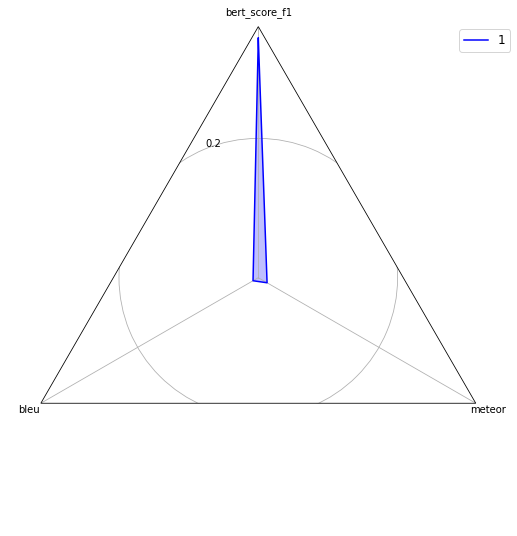

In [ ]:
from summertime.evaluation.model_selector import ModelSelector

new_selector = ModelSelector(models, generator2, metrics)
smart_table = new_selector.run_halving(min_instances=2, factor=2)
print(smart_table)
visualization_smart = new_selector.visualize(smart_table)

### Using a scatter plot

In [ ]:
from summertime.evaluation.model_selector import ModelSelector
from summertime.evaluation.error_viz import scatter

keys = ("bert_score_f1", "bleu", "rouge_1_f_score", "rouge_2_f_score", "rouge_l_f_score", "rouge_we_3_f", "meteor")

scatter(models, sample_data, metrics[1:3], keys=keys[1:3], max_instances=5)


## More Model and dataset tests

The cells below demonstrate the features of the SummerTime library more comprehensively. They are a slightly modified version of our unit tests that applies different models on all the datasets and evaluates the results on each metric.

NOTE: Please change the runtime type to GPU in order to run the next cell as it is computationally heavy

To do so, go to:
Runtime -> Change Runtime -> Select 'GPU'

In [ ]:
import unittest

from summertime.model.base_model import SummModel
from summertime.model import SUPPORTED_SUMM_MODELS, LexRankModel, PegasusModel, HMNetModel

from summertime.pipeline import assemble_model_pipeline

from summertime.evaluation.base_metric import SummMetric
from summertime.evaluation import SUPPORTED_EVALUATION_METRICS, Rouge, RougeWe

from summertime.dataset.st_dataset import SummInstance, SummDataset
from summertime.dataset import SUPPORTED_SUMM_DATASETS
from summertime.dataset.dataset_loaders import ScisummnetDataset, SummscreenDataset, ArxivDataset, CnndmDataset, MlsumDataset, SamsumDataset

from tests.helpers import print_with_color, retrieve_random_test_instances

import random
import time
from typing import Dict, List, Union, Tuple
import sys

import nltk
nltk.download('stopwords')


class IntegrationTests(unittest.TestCase):
    
    def get_prediction(self, model: SummModel, dataset: SummDataset, test_instances: List[SummInstance]) -> Tuple[Union[List[str], List[List[str]]], Union[List[str], List[List[str]]]]:
        """
        Get summary prediction given model and dataset instances.

        :param SummModel `model`: Model for summarization task.
        :param SummDataset `dataset`: Dataset for summarization task.
        :param List[SummInstance] `test_instances`: Instances from `dataset` to summarize.
        :returns Tuple containing summary list of summary predictions and targets corresponding to each instance in `test_instances`.
        """

        src = [ins.source[0] for ins in test_instances] if isinstance(dataset, ScisummnetDataset) else [ins.source for ins in test_instances]
        tgt = [ins.summary for ins in test_instances]
        query = [ins.query for ins in test_instances] if dataset.is_query_based else None
        prediction = model.summarize(src, query)
        return prediction, tgt
    
    def get_eval_dict(self, metric: SummMetric, prediction: List[str], tgt: List[str]):
        """
        Run evaluation metric on summary prediction.

        :param SummMetric `metric`: Evaluation metric.
        :param List[str] `prediction`: Summary prediction instances.
        :param List[str] `tgt`: Target prediction instances from dataset.
        """
        score_dict = metric.evaluate(prediction, tgt)
        return score_dict

    def test_all(self):
        """
        Runs integration test on all compatible dataset + model + evaluation metric pipelines supported by SummerTime.
        """

        print_with_color("\nInitializing all evaluation metrics...", "35")
        evaluation_metrics = []
        for eval_cls in SUPPORTED_EVALUATION_METRICS:
            # # TODO: Temporarily skipping Rouge/RougeWE metrics to avoid local bug.
            # if eval_cls in [Rouge, RougeWe]:
            #     continue
            print(eval_cls)
            evaluation_metrics.append(eval_cls())

        print_with_color("\n\nBeginning integration tests...", "35")
        for dataset_cls in SUPPORTED_SUMM_DATASETS:
            # TODO: Temporarily skipping MLSumm (Gitlab: server-side login gating) and Arxiv (size/time)
            if dataset_cls in [MlsumDataset, ArxivDataset]:
                continue
            dataset = dataset_cls()
            if dataset.train_set is not None:
                dataset_instances = list(dataset.train_set)
                print(f"\n{dataset.dataset_name} has a training set of {len(dataset_instances)} examples")
                print_with_color(f"Initializing all matching model pipelines for {dataset.dataset_name} dataset...", "35")
                # # TODO Temporarily skipping HMNetModel to a avoid a bug on this branch
                matching_model_instances = assemble_model_pipeline(dataset_cls, list(filter(lambda m: m != HMNetModel, SUPPORTED_SUMM_MODELS)))
                for model, model_name in matching_model_instances:
                    test_instances = retrieve_random_test_instances(dataset_instances=dataset_instances, num_instances=1)
                    print_with_color(f"{'#' * 20} Testing: {dataset.dataset_name} dataset, {model_name} model {'#' * 20}", "35")
                    prediction, tgt = self.get_prediction(model, dataset, test_instances)
                    print(f"Prediction: {prediction}\nTarget: {tgt}\n")
                    for metric in evaluation_metrics:
                        print_with_color(f"{metric.metric_name} metric", "35")
                        score_dict = self.get_eval_dict(metric, prediction, tgt)
                        print(score_dict)

                    print_with_color(f"{'#' * 20} Test for {dataset.dataset_name} dataset, {model_name} model COMPLETE {'#' * 20}\n\n", "32")

unittest.main(argv=['first-arg-is-ignored'], exit=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Initializing all evaluation metrics...
<class 'summertime.evaluation.bertscore_metric.BertScore'>
<class 'summertime.evaluation.bleu_metric.Bleu'>
<class 'summertime.evaluation.rouge_metric.Rouge'>
<class 'summertime.evaluation.rougewe_metric.RougeWe'>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'summertime.evaluation.meteor_metric.Meteor'>


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.




Beginning integration tests...


  1%|          | 1628/287113 [00:00<00:17, 16271.25it/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234. Subsequent calls will reuse this data.


100%|██████████| 287113/287113 [00:24<00:00, 11664.29it/s]



CNN/DailyMail has a training set of 287113 examples
Initializing all matching model pipelines for CNN/DailyMail dataset...


Reusing dataset cnn_dailymail (/root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)


  0%|          | 0/287113 [00:00<?, ?it/s]

You are using a model of type encoder_decoder to instantiate a model of type encoder-decoder. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at patrickvonplaten/longformer2roberta-cnn_dailymail-fp16 were not used when initializing EncoderDecoderModel: ['decoder.roberta.pooler.dense.weight', 'decoder.roberta.pooler.dense.bias']
- This IS expected if you are initializing EncoderDecoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EncoderDecoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



init load pretrained tokenizer



init load pretrained model with tokenizer on cpu
